In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('data/diabetes.csv')

In [32]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
440,0,189,104,25,0,34.3,0.435,41,1
703,2,129,0,0,0,38.5,0.304,41,0
556,1,97,70,40,0,38.1,0.218,30,0
413,1,143,74,22,61,26.2,0.256,21,0
406,4,115,72,0,0,28.9,0.376,46,1
700,2,122,76,27,200,35.9,0.483,26,0
603,7,150,78,29,126,35.2,0.692,54,1
469,6,154,78,41,140,46.1,0.571,27,0
4,0,137,40,35,168,43.1,2.288,33,1
59,0,105,64,41,142,41.5,0.173,22,0


In [33]:
df.shape

(768, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


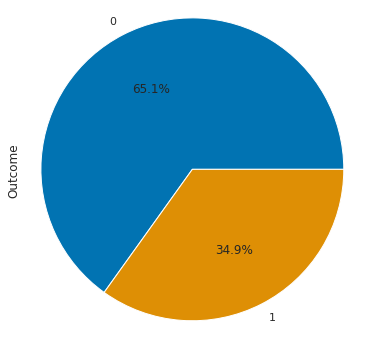

In [38]:
sns.set(style="whitegrid")
sns.set_palette('colorblind')
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%',figsize=(6,6))
plt.axis('equal')
plt.show()

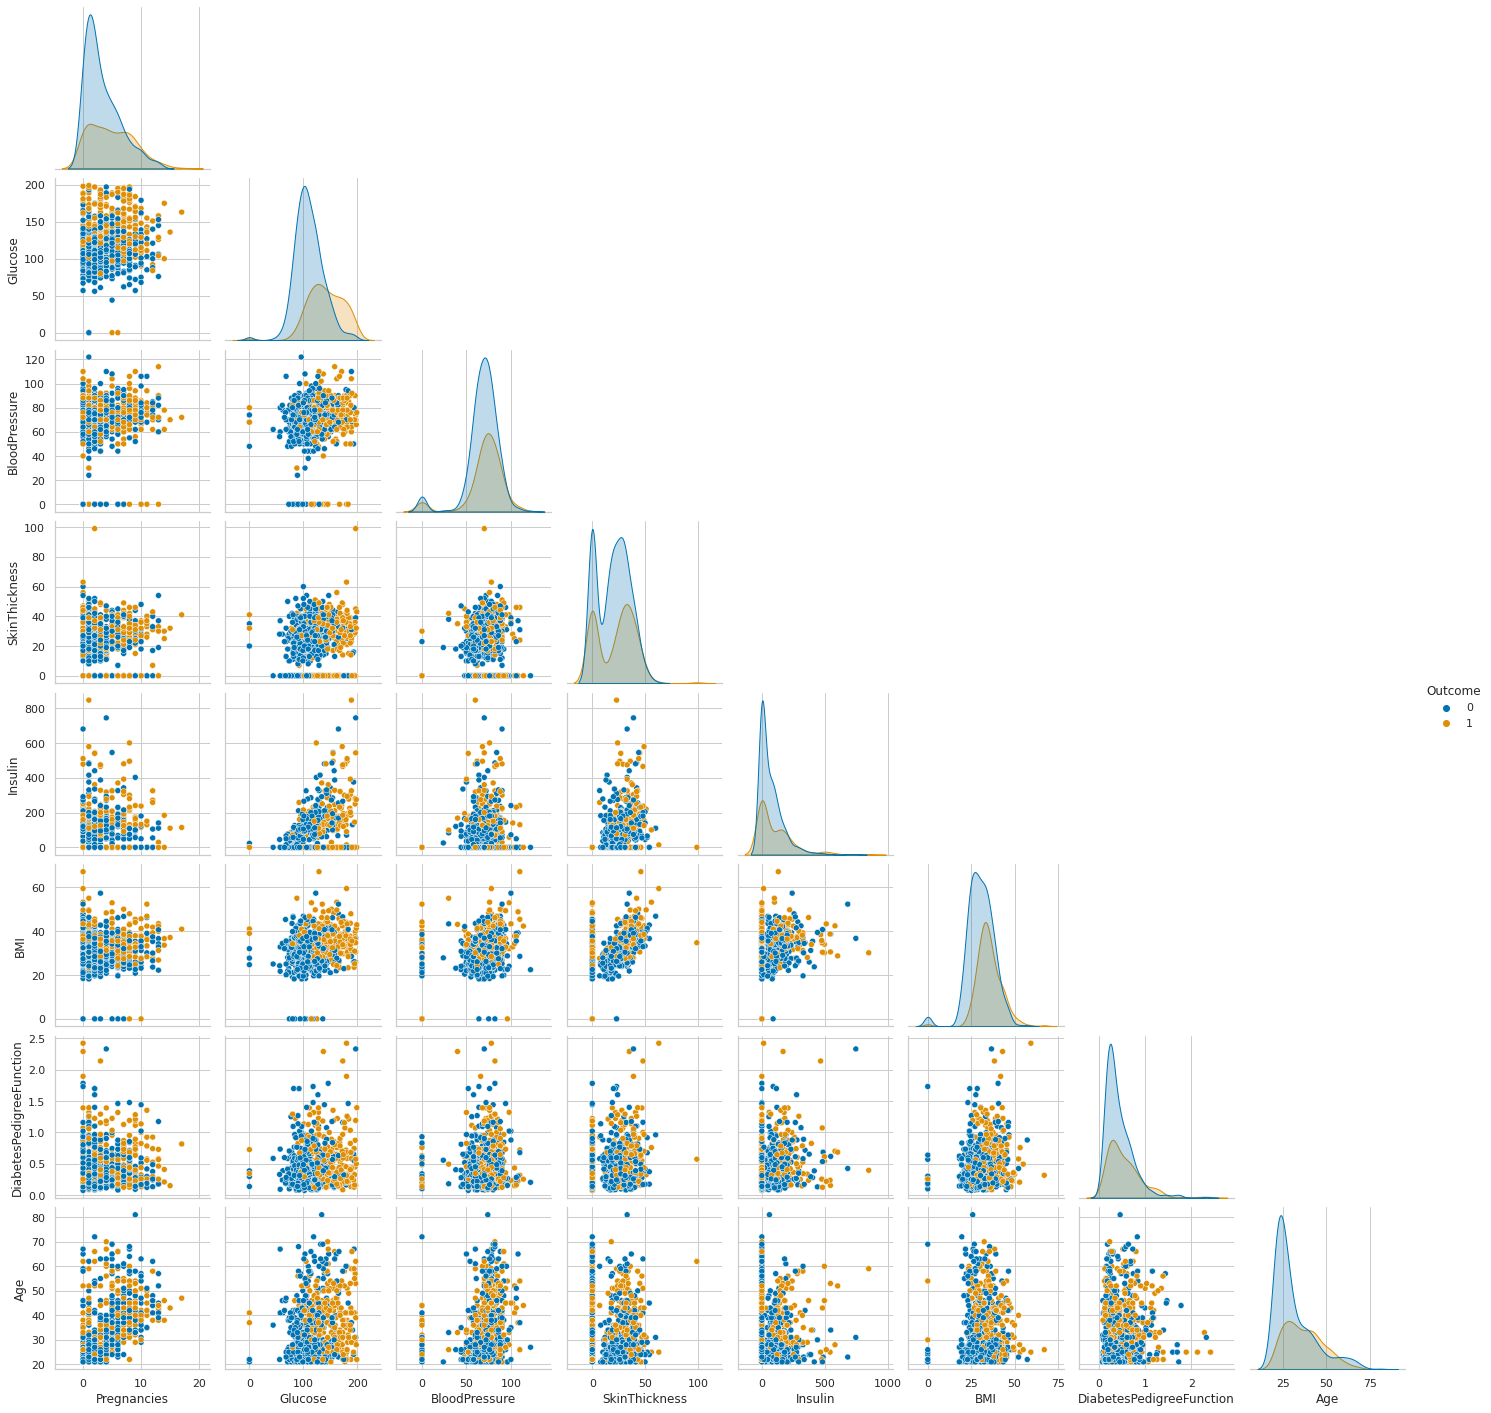

In [39]:
sns.pairplot(df, hue='Outcome',corner='True', palette= 'colorblind')
plt.show()

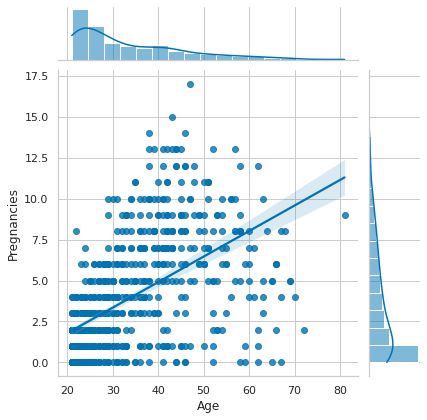

In [40]:
sns.jointplot(x="Age", y="Pregnancies", kind = 'reg', data=df)
plt.show()

In [42]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [67]:
print('Train')
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

print('\nTest')
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

Train
X_train:  (576, 8)
y_train:  (576,)

Test
X_test:  (192, 8)
y_test:  (192,)


In [68]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [71]:
y_pred = model.predict(X_test)
print(y_pred[:20])

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [72]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.8125
